In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import swifter
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import graphviz
from sklearn import tree
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification

In [2]:
# code for exporting the information as pickle format.
# info.to_pickle('data_format1/user_info_format1.pkl')
# log = log.to_pickle('data_format1/user_log_format1.pkl')

In [3]:
# code for importing the original data.
info = pd.read_csv('data_format1/user_info_format1.csv')
log = pd.read_csv('data_format1/user_log_format1.csv')
#info = pd.read_pickle('data_format1/user_info_format1.pkl')
#log = pd.read_pickle('data_format1/user_log_format1.pkl')
df_train = pd.read_csv('data_format1/train_format1.csv')

In [4]:
df_Train = pd.read_csv('data_format1/train_format1.csv')

In [5]:
# info_ori = info.copy()
# log_ori = log.copy()
# df_train_ori = df_train.copy()

In [6]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [7]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


In [8]:
info.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [9]:
log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [10]:
info['age_range'] = info['age_range'].fillna(0)
info['gender'] = info['gender'].fillna(2)

In [11]:
info['age_range'] = info['age_range'].astype('category')
info['gender'] = info['gender'].astype('category')

In [12]:
info['age_range'] = info['age_range'].replace(8, 7)

In [13]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   user_id    424170 non-null  int64   
 1   age_range  424170 non-null  category
 2   gender     424170 non-null  category
dtypes: category(2), int64(1)
memory usage: 4.0 MB


In [14]:
def ChangeDateFormat(date):
    month = date // 100
    day = date % 100
    date = '2020-' + str(month) + '-' + str(day)
    return pd.Timestamp(date)

In [15]:
log['time_stamp'] = log['time_stamp'].swifter.apply(lambda x: ChangeDateFormat(x))

Dask Apply:   0%|          | 0/32 [00:00<?, ?it/s]

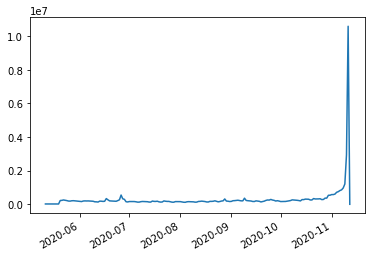

In [16]:
log['time_stamp'].value_counts().plot(kind='line')

[Text(0, 0, 'unknown'),
 Text(0, 1, '<18'),
 Text(0, 2, '18-24'),
 Text(0, 3, '25-29'),
 Text(0, 4, '30-34'),
 Text(0, 5, '35-39'),
 Text(0, 6, '40-49'),
 Text(0, 7, '>=50')]

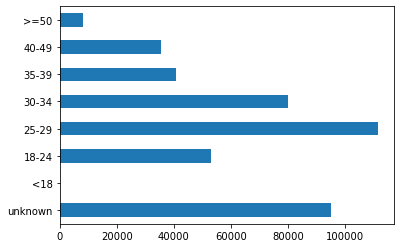

In [17]:
fig = info['age_range'].value_counts(sort=False).plot(kind='barh')
fig.set_yticklabels(["unknown","<18","18-24","25-29","30-34","35-39","40-49",">=50"])

[Text(0, 0, 'female'), Text(0, 1, 'male'), Text(0, 2, 'unknown')]

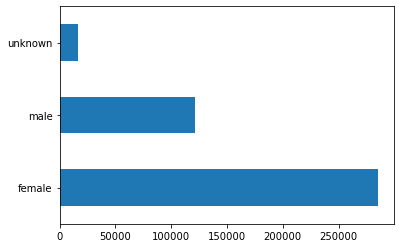

In [18]:
fig = info['gender'].value_counts(sort=False).plot(kind='barh')
fig.set_yticklabels(["female","male", "unknown"])

[Text(0, 0, 'click'),
 Text(0, 1, 'add-to-cart'),
 Text(0, 2, 'purchase'),
 Text(0, 3, 'add-to-favorite')]

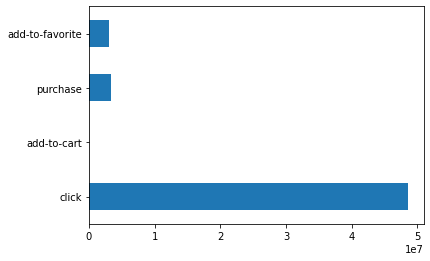

In [19]:
fig = log['action_type'].value_counts(sort=False).plot(kind='barh')
fig.set_yticklabels(['click', 'add-to-cart', 'purchase', 'add-to-favorite'])

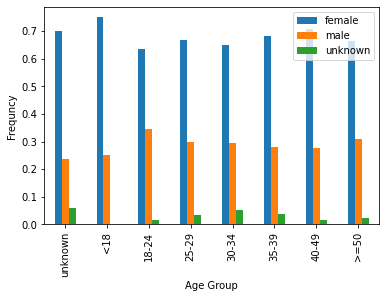

In [20]:
ct = pd.crosstab(info['age_range'], info['gender'], margins=True)
fig = ct.iloc[:,0:-1].div(ct.iloc[:,-1], axis=0).round(3).iloc[0:-1,:].plot(kind='bar')
fig.set_xticklabels(["unknown","<18","18-24","25-29","30-34","35-39","40-49",">=50"])
fig.set_xlabel('Age Group')
fig.set_ylabel('Frequncy')
plt.legend(['female', 'male', 'unknown'])

### Seller info

In [21]:
seller_item_count = log[['seller_id','item_id']]
seller_item_count = seller_item_count.drop_duplicates()
seller_item_count['seller_item_count'] = 1
seller_item_count = seller_item_count.groupby(['seller_id']).agg('sum')
seller_item_count = seller_item_count.drop(columns=['item_id'])
seller_item_count.head()

,seller_item_count
seller_id,
1,2977
2,154
3,171
4,155
5,660


In [22]:
seller_brand_count = log[['seller_id','brand_id']]
seller_brand_count = seller_brand_count.drop_duplicates()
seller_brand_count = seller_brand_count.groupby(['seller_id']).agg(len)
seller_brand_count.rename(columns = {"brand_id": "brand_count"},inplace=True) 
seller_brand_count.head()

,brand_count
seller_id,
1,3.0
2,2.0
3,2.0
4,3.0
5,2.0


In [23]:
item_info = log['item_id'].value_counts()
cat_info = log['cat_id'].value_counts()
brand_info = log['brand_id'].value_counts()
seller_info = log['seller_id'].value_counts()
print(item_info.head(), item_info.size)
print(cat_info.head(),cat_info.size)
print(brand_info.head(),brand_info.size)
print(seller_info.head(),seller_info.size)

67897     345905
783997    178005
636863     82480
631714     42771
61518      34801
Name: item_id, dtype: int64 1090390
662     4339025
737     1749753
1505    1724239
389     1621736
656     1538969
Name: cat_id, dtype: int64 1658
3738.0    763345
1360.0    737545
1446.0    729555
1214.0    541075
5376.0    528003
Name: brand_id, dtype: int64 8443
3760    743217
3828    730455
184     613811
1102    541374
4173    528755
Name: seller_id, dtype: int64 4995


In [24]:
log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,2020-08-29,0
1,328862,844400,1271,2882,2661.0,2020-08-29,0
2,328862,575153,1271,2882,2661.0,2020-08-29,0
3,328862,996875,1271,2882,2661.0,2020-08-29,0
4,328862,1086186,1271,1253,1049.0,2020-08-29,0


In [25]:
log_sample = log.sample(frac=0.005,random_state=1)

In [26]:
# log_sample.pivot_table(index=['user_id','seller_id'],aggfunc=len)

In [27]:
user_seller = log_sample.groupby(['user_id','seller_id'])['item_id'].count()

In [28]:
user_seller.head()

user_id  seller_id
3        806          1
         2472         1
4        2102         1
11       4472         1
14       1480         1
Name: item_id, dtype: int64

In [29]:
user_seller[user_seller > 1]

user_id  seller_id
14       3828         2
22       184          3
44       3064         2
46       1595         2
50       4976         2
                     ..
424001   4173         2
424034   1679         2
424056   1928         2
424099   1941         2
424131   2823         2
Name: item_id, Length: 13289, dtype: int64

In [30]:
user_seller = user_seller > 1

In [31]:
user_seller.head()

user_id  seller_id
3        806          False
         2472         False
4        2102         False
11       4472         False
14       1480         False
Name: item_id, dtype: bool

In [32]:
df_train.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


### user action

In [33]:
actions = log.action_type
actions = pd.get_dummies(actions,prefix='action_count')
user_action = pd.concat([log.user_id,actions],axis=1)
# user_action = log[['user_id','action_type']]
# user_action.action_type = user_action.action_type.astype('category')

user_action = user_action.groupby('user_id').agg('sum')
user_action.head()

,action_count_0,action_count_1,action_count_2,action_count_3
user_id,,,,
1,27.0,0.0,6.0,0.0
2,47.0,0.0,14.0,2.0
3,63.0,0.0,4.0,1.0
4,49.0,0.0,1.0,0.0
5,150.0,0.0,13.0,10.0


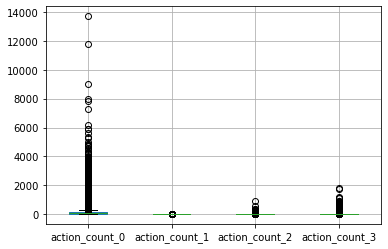

In [34]:
user_action.boxplot()

In [35]:
df_Train.head(3)

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1


In [36]:
# df_label1 = df_Train[df_Train.label==1]
# df_label11 = df_label1.copy()

In [37]:
# for i in range(10):
#     df_label11 = pd.concat([df_label11,df_label1],axis=0)
#     print(df_label11.shape[0])    

In [38]:
# df_train = pd.concat([df_Train,df_label11],axis=0)

In [39]:
seller = seller_item_count.merge(seller_brand_count,on='seller_id')

In [40]:
df_train = df_Train.merge(seller,left_on='merchant_id',right_on='seller_id')

In [41]:
df_train = df_train.merge(user_action,on='user_id')

In [42]:
df_train.head(3)

,user_id,merchant_id,label,seller_item_count,brand_count,action_count_0,action_count_1,action_count_2,action_count_3
0,34176,3906,0,308,2.0,410.0,0.0,34.0,7.0
1,34176,121,0,1179,2.0,410.0,0.0,34.0,7.0
2,34176,4356,1,67,2.0,410.0,0.0,34.0,7.0


In [43]:
log_dummy = pd.get_dummies(log['action_type'],prefix='action')
log_dummy = pd.concat([log.user_id,log.seller_id,actions],axis=1)
log_dummy.columns = ['user_id', 'merchant_id', 'action_0', 'action_1',
       'action_2', 'action_3']
log_dummy = log_dummy.groupby(['user_id','merchant_id']).agg('sum')

In [44]:
log_dummy.head(3)

action_0  action_1  action_2  action_3
user_id merchant_id                                        
1       471               1.0       0.0       0.0       0.0
        739               1.0       0.0       0.0       0.0
        925               3.0       0.0       1.0       0.0

In [45]:
df_train = df_train.merge(log_dummy,on=['merchant_id','user_id'])

In [46]:
df_train.head(3)

,user_id,merchant_id,label,seller_item_count,brand_count,action_count_0,action_count_1,action_count_2,action_count_3,action_0,action_1,action_2,action_3
0,34176,3906,0,308,2.0,410.0,0.0,34.0,7.0,36.0,0.0,1.0,2.0
1,34176,121,0,1179,2.0,410.0,0.0,34.0,7.0,13.0,0.0,1.0,0.0
2,34176,4356,1,67,2.0,410.0,0.0,34.0,7.0,12.0,0.0,6.0,0.0


In [47]:
train,test = train_test_split(df_train,test_size=0.2,random_state=0,shuffle=True,stratify=df_train.label)

In [48]:
train.head(3)

,user_id,merchant_id,label,seller_item_count,brand_count,action_count_0,action_count_1,action_count_2,action_count_3,action_0,action_1,action_2,action_3
105458,63428,467,0,442,4.0,167.0,0.0,8.0,3.0,7.0,0.0,2.0,0.0
74568,271231,241,1,33,2.0,52.0,0.0,7.0,1.0,5.0,0.0,1.0,0.0
86964,308499,2928,0,757,2.0,33.0,0.0,2.0,0.0,7.0,0.0,1.0,0.0


In [49]:
targets_train = train.label
targets_test = test.label
attributes_train = train.drop(['merchant_id','user_id','label'],axis=1)
attributes_test = test.drop(['merchant_id','user_id','label'],axis=1)

In [50]:
attributes_train.head(3)

,seller_item_count,brand_count,action_count_0,action_count_1,action_count_2,action_count_3,action_0,action_1,action_2,action_3
105458,442,4.0,167.0,0.0,8.0,3.0,7.0,0.0,2.0,0.0
74568,33,2.0,52.0,0.0,7.0,1.0,5.0,0.0,1.0,0.0
86964,757,2.0,33.0,0.0,2.0,0.0,7.0,0.0,1.0,0.0


## Logistic Regression

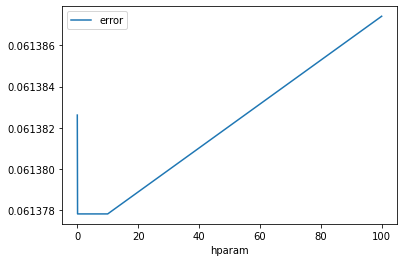

In [51]:
lgr = LogisticRegression(max_iter=1000)
hparam = {'C':[0.01,0.1,1,10,100]}
lgrCV = GridSearchCV(lgr,param_grid=hparam)
lgrCV.fit(attributes_train,targets_train)
results = pd.DataFrame()
results['hparam'] = hparam['C']
results['error'] = 1 - lgrCV.cv_results_['mean_test_score']
results.plot.line(x='hparam',y='error')

In [52]:
(lgrCV.best_estimator_.predict(attributes_test) == targets_test).mean()

0.9387039273187281

## Decision Tree

In [53]:
hparam = {'max_depth':range(1,6)}

In [54]:
Tree = DecisionTreeClassifier(random_state=1)
treeCV = GridSearchCV(Tree, param_grid=hparam, return_train_score=True)

In [55]:
treeCV.fit(attributes_train, targets_train)
print('best param', treeCV.best_params_)
print("test errror rate", (1 - treeCV.best_score_).round(3))

best param {'max_depth': 4}
test errror rate 0.061


In [56]:
(treeCV.best_estimator_.predict(attributes_test) == targets_test).mean()

0.9388572633354417

In [57]:
1-3190/48983

0.9348753649225241

## Bayesian

In [58]:
hparam = {'alpha':np.arange(1,10)/10}
NBayes = MultinomialNB()
NBayesCV = GridSearchCV(NBayes,param_grid = hparam)
NBayesCV.fit(attributes_train,targets_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [59]:
NBayesCV.best_params_

{'alpha': 0.8}

In [60]:
(NBayesCV.best_estimator_.predict(attributes_test) == targets_test).mean()

0.7945680716079198

## Standardization

In [61]:
#df_train.to_pickle('data_format1/df_train_good.pkl')

In [62]:
df_train = pd.read_pickle('./data_format1/df_train_good.pkl')

In [63]:
df_train.head()

,user_id,merchant_id,label,seller_item_count,brand_count,action_count_0,action_count_1,action_count_2,action_count_3,action_0,action_1,action_2,action_3
0,34176,3906,0,308,2.0,410.0,0.0,34.0,7.0,36.0,0.0,1.0,2.0
1,34176,121,0,1179,2.0,410.0,0.0,34.0,7.0,13.0,0.0,1.0,0.0
2,34176,4356,1,67,2.0,410.0,0.0,34.0,7.0,12.0,0.0,6.0,0.0
3,34176,2217,0,377,2.0,410.0,0.0,34.0,7.0,1.0,0.0,1.0,0.0
4,81036,3906,0,308,2.0,129.0,0.0,25.0,21.0,5.0,0.0,1.0,1.0


In [64]:
df_train = df_train.merge(info[['user_id','age_range','gender']])

In [65]:
df_train.head()

,user_id,merchant_id,label,seller_item_count,brand_count,action_count_0,action_count_1,action_count_2,action_count_3,action_0,action_1,action_2,action_3,age_range,gender
0,34176,3906,0,308,2.0,410.0,0.0,34.0,7.0,36.0,0.0,1.0,2.0,6.0,0.0
1,34176,121,0,1179,2.0,410.0,0.0,34.0,7.0,13.0,0.0,1.0,0.0,6.0,0.0
2,34176,4356,1,67,2.0,410.0,0.0,34.0,7.0,12.0,0.0,6.0,0.0,6.0,0.0
3,34176,2217,0,377,2.0,410.0,0.0,34.0,7.0,1.0,0.0,1.0,0.0,6.0,0.0
4,81036,3906,0,308,2.0,129.0,0.0,25.0,21.0,5.0,0.0,1.0,1.0,0.0,0.0


In [66]:
catDummies = pd.get_dummies(df_train[['gender','age_range']])

In [67]:
catDummies.head()

,gender_0.0,gender_1.0,gender_2.0,age_range_0.0,age_range_1.0,age_range_2.0,age_range_3.0,age_range_4.0,age_range_5.0,age_range_6.0,age_range_7.0
0,1,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,0


In [68]:
features = df_train.drop(['label','user_id','merchant_id','age_range','gender'],axis = 1)

In [69]:
features.head()

,seller_item_count,brand_count,action_count_0,action_count_1,action_count_2,action_count_3,action_0,action_1,action_2,action_3
0,308,2.0,410.0,0.0,34.0,7.0,36.0,0.0,1.0,2.0
1,1179,2.0,410.0,0.0,34.0,7.0,13.0,0.0,1.0,0.0
2,67,2.0,410.0,0.0,34.0,7.0,12.0,0.0,6.0,0.0
3,377,2.0,410.0,0.0,34.0,7.0,1.0,0.0,1.0,0.0
4,308,2.0,129.0,0.0,25.0,21.0,5.0,0.0,1.0,1.0


In [70]:
features = (features - features.mean())/features.std()

In [71]:
features.head()

,seller_item_count,brand_count,action_count_0,action_count_1,action_count_2,action_count_3,action_0,action_1,action_2,action_3
0,-0.217258,-0.275409,1.504636,-0.204825,2.835969,-0.036992,1.414559,-0.112848,-0.394716,1.131803
1,0.933094,-0.275409,1.504636,-0.204825,2.835969,-0.036992,0.206116,-0.112848,-0.394716,-0.271127
2,-0.535553,-0.275409,1.504636,-0.204825,2.835969,-0.036992,0.153575,-0.112848,5.423893,-0.271127
3,-0.126128,-0.275409,1.504636,-0.204825,2.835969,-0.036992,-0.424376,-0.112848,-0.394716,-0.271127
4,-0.217258,-0.275409,0.017260,-0.204825,1.826829,0.594709,-0.214212,-0.112848,-0.394716,0.430338


In [72]:
stanData = pd.concat([features,catDummies,df_train.label],axis=1)
stanData.head()

,seller_item_count,brand_count,action_count_0,action_count_1,action_count_2,action_count_3,action_0,action_1,action_2,action_3,...,gender_2.0,age_range_0.0,age_range_1.0,age_range_2.0,age_range_3.0,age_range_4.0,age_range_5.0,age_range_6.0,age_range_7.0,label
0,-0.217258,-0.275409,1.504636,-0.204825,2.835969,-0.036992,1.414559,-0.112848,-0.394716,1.131803,...,0,0,0,0,0,0,0,1,0,0
1,0.933094,-0.275409,1.504636,-0.204825,2.835969,-0.036992,0.206116,-0.112848,-0.394716,-0.271127,...,0,0,0,0,0,0,0,1,0,0
2,-0.535553,-0.275409,1.504636,-0.204825,2.835969,-0.036992,0.153575,-0.112848,5.423893,-0.271127,...,0,0,0,0,0,0,0,1,0,1
3,-0.126128,-0.275409,1.504636,-0.204825,2.835969,-0.036992,-0.424376,-0.112848,-0.394716,-0.271127,...,0,0,0,0,0,0,0,1,0,0
4,-0.217258,-0.275409,0.017260,-0.204825,1.826829,0.594709,-0.214212,-0.112848,-0.394716,0.430338,...,0,1,0,0,0,0,0,0,0,0


In [73]:
train,test = train_test_split(stanData,test_size=0.2,random_state=0,shuffle=True,stratify=stanData.label)
targets_train = train.label
targets_test = test.label
attributes_train = train.drop(['label'],axis=1)
attributes_test = test.drop(['label'],axis=1)

## Logistic Regression

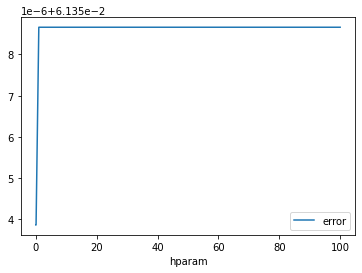

In [74]:
slgr = LogisticRegression(max_iter=1000)
hparam = {'C':[0.01,0.1,1,10,100]}
slgrCV = GridSearchCV(slgr,param_grid=hparam)
slgrCV.fit(attributes_train,targets_train)
results = pd.DataFrame()
results['hparam'] = hparam['C']
results['error'] = 1 - slgrCV.cv_results_['mean_test_score']
results.plot.line(x='hparam',y='error')

In [75]:
(slgrCV.best_estimator_.predict(attributes_test) == targets_test).mean()

0.9386847603166388

## Decision Tree

In [76]:
hparam = {'max_depth':range(1,6)}

In [77]:
sTree = DecisionTreeClassifier(random_state=1)
streeCV = GridSearchCV(sTree, param_grid=hparam, return_train_score=True)

In [78]:
streeCV.fit(attributes_train,targets_train)
print('best param', streeCV.best_params_)
print("test errror rate", (1 - streeCV.best_score_).round(3))

best param {'max_depth': 4}
test errror rate 0.061


In [79]:
(streeCV.best_estimator_.predict(attributes_test) == targets_test).mean()

0.9388572633354417

## Random Forest

In [80]:
hparam = {'n_estimators':range(5,21)}

In [81]:
forest = RandomForestClassifier() 

In [82]:
forestCV = GridSearchCV(forest, param_grid=hparam, return_train_score=True, n_jobs=-1)

In [83]:
forestCV.fit(attributes_train,targets_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(5, 21)},
             return_train_score=True)

In [84]:
forestCV.best_score_

0.9382771657331906

In [86]:
df_train.to_pickle('data_format1/df_train_good.pkl')

## Baseline & Visualization

In [100]:
df_train[df_train['label']==1].shape[0] #1

15952

In [105]:
df_train[df_train['label']==0].shape[0] #0

244912

In [108]:
244912/df_train.shape [0] #0

0.9388493621197253

In [125]:
1/0.9388493621197253

1.0651335990069903

In [109]:
15952/df_train.shape [0] #1

0.06115063788027478

In [126]:
1/0.06115063788027478

16.353059177532597

C:\Users\chenx16\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


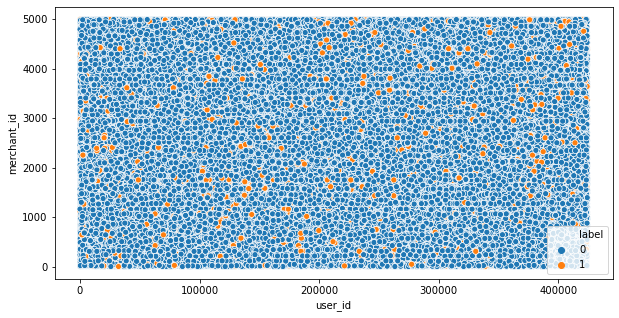

In [116]:
plt.figure(figsize =(10,5))
sns.scatterplot(data = df_train,x ='user_id',y ='merchant_id',hue ='label')